In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

sns.set()
plt.rcParams["figure.figsize"] = (12, 8)

### Загрузка данных

In [ ]:
data = fetch_20newsgroups()
text_categories = data.target_names
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [ ]:
text_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Пайплайн CountVectorizer + LogisticRegression

In [ ]:
model = make_pipeline(CountVectorizer(), LogisticRegression()) # максимально простой пайплайн без подбора гиперпараметров
model.fit(train_data.data, train_data.target)
predicted_categories = model.predict(test_data.data)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


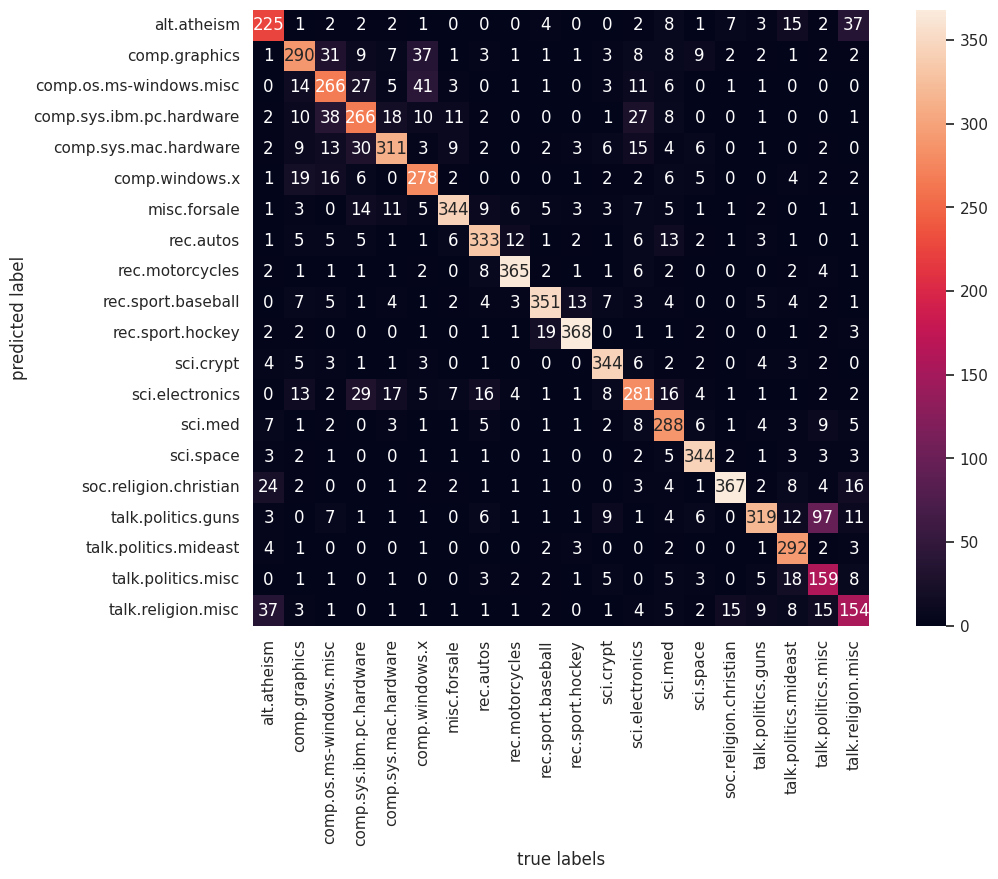

In [ ]:
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [ ]:
print(classification_report(test_data.target, predicted_categories))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       319
           1       0.69      0.75      0.72       389
           2       0.70      0.68      0.69       394
           3       0.67      0.68      0.68       392
           4       0.74      0.81      0.77       385
           5       0.80      0.70      0.75       395
           6       0.82      0.88      0.85       390
           7       0.83      0.84      0.84       396
           8       0.91      0.92      0.91       398
           9       0.84      0.88      0.86       397
          10       0.91      0.92      0.92       399
          11       0.90      0.87      0.89       396
          12       0.68      0.72      0.70       393
          13       0.83      0.73      0.77       396
          14       0.92      0.87      0.90       394
          15       0.84      0.92      0.88       398
          16       0.66      0.88      0.76       364
          17       0.94    

### Пайплайн TfIdf + LogisticRegression

In [ ]:
model = make_pipeline(TfidfVectorizer(), LogisticRegression()) # снова максимально простой пайплайн без подбора гиперпараметров
model.fit(train_data.data, train_data.target)
predicted_categories = model.predict(test_data.data)

In [ ]:
print(classification_report(test_data.target, predicted_categories))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       319
           1       0.69      0.79      0.74       389
           2       0.75      0.73      0.74       394
           3       0.72      0.72      0.72       392
           4       0.81      0.83      0.82       385
           5       0.83      0.74      0.78       395
           6       0.76      0.90      0.82       390
           7       0.90      0.89      0.90       396
           8       0.95      0.95      0.95       398
           9       0.88      0.92      0.90       397
          10       0.94      0.95      0.95       399
          11       0.94      0.88      0.91       396
          12       0.76      0.80      0.78       393
          13       0.89      0.83      0.85       396
          14       0.91      0.92      0.91       394
          15       0.81      0.94      0.87       398
          16       0.72      0.88      0.79       364
          17       0.96    

### Предобученные эмбеддинги + LogisticRegression

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2023-04-17 06:02:43--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.7.50, 13.35.7.82, 13.35.7.38, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.7.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M   123MB/s    in 6.9s    

2023-04-17 06:02:50 (94.0 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [ ]:
!unzip wiki-news-300d-1M.vec.zip

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [ ]:
wv = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec')

In [1]:
import re

In [ ]:
%%time

train_vectors = np.array([wv.get_mean_vector(re.findall(r'(?u)\b\w\w+\b', text.lower())) for text in tqdm(train_data.data)])
train_vectors.shape

  0%|          | 0/11314 [00:00<?, ?it/s]

CPU times: user 40.9 s, sys: 280 ms, total: 41.2 s
Wall time: 48.3 s


(11314, 300)

In [ ]:
%%time

test_vectors = np.array([wv.get_mean_vector(re.findall(r'(?u)\b\w\w+\b', text.lower())) for text in tqdm(test_data.data)])
test_vectors.shape

  0%|          | 0/7532 [00:00<?, ?it/s]

CPU times: user 24.9 s, sys: 168 ms, total: 25.1 s
Wall time: 25.6 s


(7532, 300)

In [ ]:
model = LogisticRegression()
model.fit(train_vectors, train_data.target)
predicted_categories = model.predict(test_vectors)
print(classification_report(test_data.target, predicted_categories))

              precision    recall  f1-score   support

           0       0.35      0.09      0.14       319
           1       0.52      0.48      0.50       389
           2       0.41      0.36      0.38       394
           3       0.44      0.52      0.48       392
           4       0.75      0.12      0.20       385
           5       0.50      0.59      0.54       395
           6       0.38      0.79      0.51       390
           7       0.65      0.58      0.61       396
           8       0.61      0.59      0.60       398
           9       0.45      0.61      0.52       397
          10       0.69      0.78      0.73       399
          11       0.52      0.60      0.56       396
          12       0.68      0.34      0.46       393
          13       0.67      0.69      0.68       396
          14       0.72      0.62      0.67       394
          15       0.30      0.90      0.45       398
          16       0.58      0.31      0.40       364
          17       0.65    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Пайплайн CountVectorizer + MultinomialNB

In [ ]:
model = make_pipeline(CountVectorizer(), MultinomialNB()) 
model.fit(train_data.data, train_data.target)
predicted_categories = model.predict(test_data.data)
print(classification_report(test_data.target, predicted_categories))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       319
           1       0.67      0.74      0.70       389
           2       0.20      0.00      0.01       394
           3       0.56      0.77      0.65       392
           4       0.84      0.75      0.79       385
           5       0.65      0.84      0.73       395
           6       0.93      0.65      0.77       390
           7       0.87      0.91      0.89       396
           8       0.96      0.92      0.94       398
           9       0.96      0.87      0.91       397
          10       0.93      0.96      0.95       399
          11       0.67      0.95      0.78       396
          12       0.79      0.66      0.72       393
          13       0.87      0.82      0.85       396
          14       0.83      0.89      0.86       394
          15       0.70      0.96      0.81       398
          16       0.69      0.91      0.79       364
          17       0.85    